In [60]:
# import the necessary libraries
import sympy as sym
from sympy import solve
from sympy.abc import x,y,a
import numpy as np
import matplotlib.pyplot as plt

### Minimize 
$$f(x_1,x_2) = x - y + 2 ( x^2 ) + 2xy + y^2 $$

In [61]:
#write the function
f = x - y + 2*(x**2) + 2 * x * y + y**2 

In [62]:
# A Function to get the extreme points using Gradient descent
def gradient_descent( f , point ):
    
    #calculating gradient
    gradient = [sym.diff(f,x),sym.diff(f,y)]

    #a list to store the value of the gradients which will be returned to be plotted
    result = []

    iteration = 0

    while True:

        #substitute with the the point in the gradient
        subs_point = [ gradient[0].subs(x, point[0] ), gradient[1].subs(y, point[1]) ]
        subs_point = [ subs_point[0].subs(y, point[1])  , subs_point[1].subs(x, point[0])]
        
        result.append( list(map(float,subs_point)))

        #check if the gradient is to small ( our convergence crieteria )
        if abs(subs_point[0]) < 0.0001 and abs(subs_point[1]) < 0.0001:
            break

        
        #calculate x + lambda * S
        new_point = [ point[0] - a * subs_point[0] , point[1] - a * subs_point[1] ]


        subs_new_point = f.subs(x, new_point[0] )
        subs_new_point = subs_new_point.subs(y, new_point[1])

        # solve for alpha
        derivative_alpha = sym.diff(subs_new_point,a)
        alpha = solve( derivative_alpha, a)

        #getting the new point
        new_point = [point[0] - alpha[0] * subs_point[0] , point[1] - alpha[0] * subs_point[1]]
        
        #storing the value of the new point in the old point for the next iterate
        point = list((map(float,new_point) ))
        
        #incrementing the number of iterations
        iteration += 1

    return result,point,iteration

In [63]:
def newton_raphson(f,point):
    
    #calculating the gradient
    gradient =[sym.diff(f,x),sym.diff(f,y)]

    
    #a list to store the value of the gradients which will be returned to be plotted
    result = []
    
    iteration = 0

    while True:

        #calculating the inverse hessian matrix 
        dx = sym.diff(f,x)
        dx2 = sym.diff(dx,x)
        dxdy = sym.diff(dx,y)

        dy = sym.diff(f,y)
        dy2 = sym.diff(dy,y)
        dydx = sym.diff(dy,x)

        det = dx2 * dy2 - dxdy * dydx
        det = 1 / det

        hessian_inverse = np.array([ [ det*dy2, - det*dxdy], [- det*dxdy,det*dx2 ]  ])

        #substitute with the the point in the gradient
        subs_point = [ gradient[0].subs(x, point[0] ), gradient[1].subs(y, point[1]) ]
        subs_point = [ subs_point[0].subs(y, point[1])  , subs_point[1].subs(x, point[0])]
        subs_point = np.array([[subs_point[0]],[subs_point[1]]])

        # store the value of the gradient
        result.append( list(map(float,subs_point)))
        
        #check if the gradient is to small ( our convergence crieteria )
        if abs(subs_point[0]) < 0.0001 and abs(subs_point[1]) < 0.0001:
            break

        #dot product of the inverse of the hessian and the gradient
        hessian_times_gradient = np.dot ( hessian_inverse, subs_point)

        #calculating the new point
        new_point = [ point[0] - hessian_times_gradient[0][0] , point[1] - hessian_times_gradient[1][0] ]

        #storing the value of the new point in the old point for the next iterate
        point = new_point
        
        #incrementing the number of iterations
        iteration += 1
    return result,point,iteration

In [64]:
#initialization points
points = [ [0,0] , [0.5,0.5] , [1,1] ]

In [65]:
# arrays to store the results using gradient descent for different initial points
results_gradient = []
extreme_point_gradient = []
iterations_gradient = []

# Minimize using each initial point using newton_raphson
for point in points:
    
    # call the function
    [result,point,iteration] = gradient_descent(f,point)
    
    #store the values
    results_gradient.append(result)
    extreme_point_gradient.append(point)
    iterations_gradient.append(iteration)

In [66]:
# arrays to store the results using newton raphson for different initial points
results_newton = []
extreme_point_newton = []
iterations_newton = []

# Minimize using each initial point using newton raphson
for point in points:
    
    # call the function
    [result,point,iteration] = newton_raphson(f,point)
    
    #store the values
    results_newton.append(result)
    extreme_point_newton.append(point)
    iterations_newton.append(iteration)

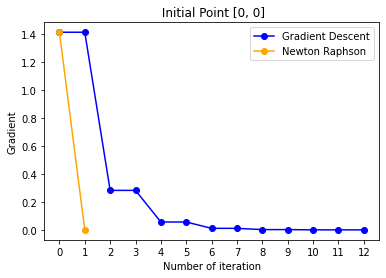

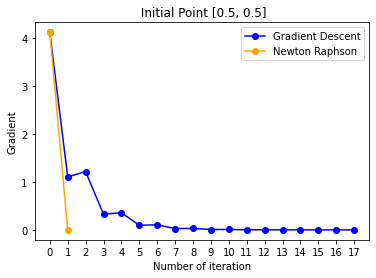

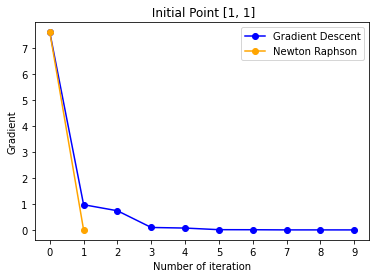

In [67]:
i = 0
for result_gradient, iteration_gradient, result_newton, iteration_newton in zip(results_gradient, iterations_gradient, results_newton, iterations_newton):
    

    result_gradient = [ np.sqrt( p[0] ** 2 + p[1] ** 2) for p in result_gradient]
    number_iteration_gradient = [i for i in range(iteration_gradient+1)]
    
    result_newton = [ np.sqrt( p[0] ** 2 + p[1] ** 2) for p in result_newton]
    number_iteration_newton = [i for i in range(iteration_newton+1)]
    
    
    plt.figure()
    plt.title(f' Initial Point { points[i] }' )
    plt.plot(number_iteration_gradient,result_gradient , 'o-' , color = 'b' , label = 'Gradient Descent' )
    plt.plot(number_iteration_newton,result_newton, 'o-', color ='orange' , label = 'Newton Raphson')
    plt.ylabel('Gradient')
    plt.xlabel('Number of iteration')
    plt.xticks(number_iteration_gradient)
    plt.legend();
    i += 1

In [68]:
print( f'Minimum point using Gradient Descent for different initial points {extreme_point_gradient}' )
print( f'Minimum point using Gradient Descent for different initial points {extreme_point_newton}' )

Minimum point using Gradient Descent for different initial points [[-0.9999359999999996, 1.4999039999999995], [-0.9999614023426919, 1.4999305242168457], [-0.9999437579637266, 1.4999043885383354]]
Minimum point using Gradient Descent for different initial points [[-1, 3/2], [-1.00000000000000, 1.50000000000000], [-1, 3/2]]
